# Random Forest for Regression

## Objectives

- Explore the application of Random Forest for regression tasks to predict continuous values.
- Evaluate the model's performance using cross-validation and various tree depth settings.
- Compare Random Forest's effectiveness against single decision trees.

## Background

Random Forest is a robust ensemble learning method used for regression, employing multiple decision trees to improve prediction accuracy and overfitting issues associated with single decision trees.

## Datasets Used

- Synthetic Dataset: Used for initial modeling and understanding tree behaviors.
- Advertising Dataset: Examines how budgets in various media affect product sales.

## Introduction

Random forest regression is one of the many ensemble learning methods. It is a bagging technique. The trees run in parallel without interaction among them.

In [1]:
import numpy as np; np.random.seed(50) 
import pandas as pd 
pd.set_option("display.max_columns", 10)
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(); sns.set_context("paper");

In [2]:
from collections import Counter
from sklearn.model_selection import cross_val_score     
from sklearn.metrics import r2_score, mean_squared_error 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree

## Understanding Random Forest

Let's start by generating some data.

### Generating Data

In [3]:
# Generating some data
x1 = np.random.uniform(0, 10, size=100)
x2 = np.random.normal(10, 4, size=100)
x3 = np.random.normal(50, 10, size=100)
x4 = np.random.uniform(50, 100, size=100)
r = np.random.normal(0,1, size=100)
y = 1.1*x1 + 1.2*x2 + 1.8*x3 + 0.7*x4 + r
df0 = pd.DataFrame({'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4, 'y':y})
df0.head()

,x1,x2,x3,x4,y
0,4.946016,9.789797,48.562334,52.731090,141.250365
1,2.280831,7.462876,44.743188,61.952535,135.452058
2,2.554739,8.548276,77.121444,64.689304,198.125185
3,3.963299,-0.283679,49.221099,57.832450,132.987758
4,3.773151,10.550059,50.820972,78.326325,164.271369


In [4]:
# Feature Matrix
features0 = ['x1', 'x2', 'x3', 'x4']
X = df0[features0].values.astype('float')

In [5]:
# Target variable
y = df0.y

### A Tree Model

Let's create a tree model with a maximum depth of 2 for simplicity.

In [6]:
# Initializing a tree model 
tree_model0 = DecisionTreeRegressor(random_state=0, max_depth=2) 

In [7]:
# Fit the model
tree_model0.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=0)

In [8]:
# Getting the score
tree_model0.score(X, y)

0.7086491355886178

In [9]:
# Getting the prediction values
df0['tree_pred'] = tree_model0.predict(X)
df0.head()

,x1,x2,x3,x4,y,tree_pred
0,4.946016,9.789797,48.562334,52.731090,141.250365,167.061154
1,2.280831,7.462876,44.743188,61.952535,135.452058,130.165390
2,2.554739,8.548276,77.121444,64.689304,198.125185,199.092427
3,3.963299,-0.283679,49.221099,57.832450,132.987758,167.061154
4,3.773151,10.550059,50.820972,78.326325,164.271369,167.061154


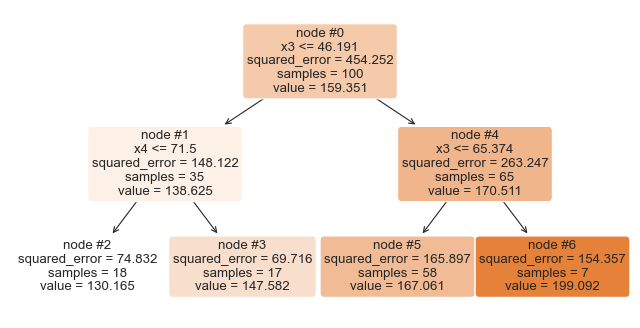

In [10]:
# Plotting the tree model
fig = plt.figure(figsize=(8,4))
plot_tree(tree_model0,
        feature_names=features0,
        node_ids=True,
        filled=True,                
        rounded=True,                 
        );

Let's count the number of samples of each leaf node.

In [11]:
leaves = Counter(tree_model0.apply(X))
nsamples = 0
for l in leaves.items():
    print('node # %.i => samples = %i' %(l[0], l[1]))
    nsamples = nsamples + l[1]
print('Number of samples in the tree: %i' %nsamples)   

node # 5 => samples = 58
node # 2 => samples = 18
node # 6 => samples = 7
node # 3 => samples = 17
Number of samples in the tree: 100


Notice the overall sum is 100, the total number of observations in the dataset.

### A Random Forest Model

Let's create a simple random forest model using 20 tree models with a maximum depth of 2 for simplicity.

In [12]:
# Initialize the model
rf_model0 = RandomForestRegressor(n_estimators=20,  # Number of trees
                                max_depth=2,        # Max depth of each tree
                                oob_score=True,     # Use OOB scoring
                                random_state=0)     # For reproducibility

In [13]:
rf_model0.fit(X, y)

RandomForestRegressor(max_depth=2, n_estimators=20, oob_score=True,
                      random_state=0)

In [14]:
print("Score = %.4f" %(rf_model0.score(X, y)))

Score = 0.8144


In [15]:
# Number of tree models used
len(rf_model0.estimators_)

20

Let's visualize some of the them.

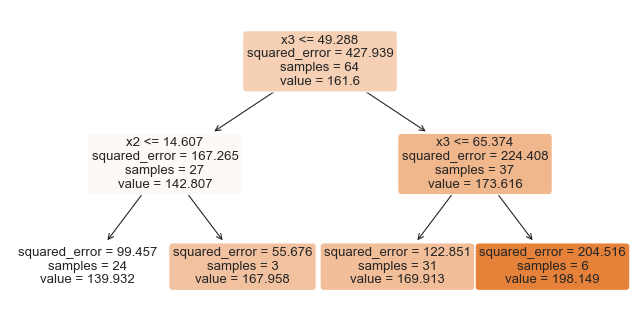

In [16]:
# Tree 0
fig = plt.figure(figsize=(8,4))
plot_tree(rf_model0.estimators_[0], 
          feature_names=features0, 
          filled=True, 
          rounded=True);

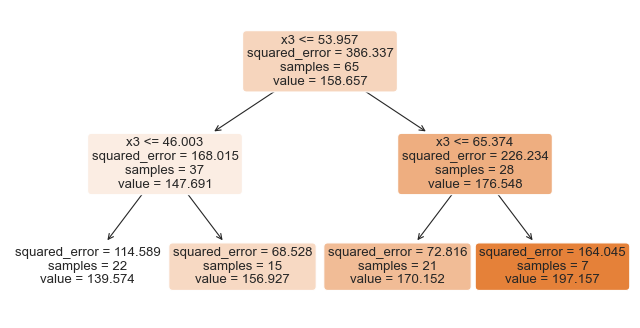

In [17]:
# Tree 8
fig = plt.figure(figsize=(8,4))
plot_tree(rf_model0.estimators_[8], 
          feature_names=features0, 
          filled=True, 
          rounded=True);

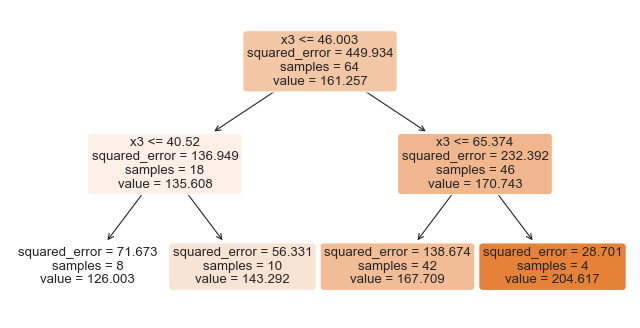

In [18]:
# Tree 19
fig = plt.figure(figsize=(8,4))
plot_tree(rf_model0.estimators_[19], 
          feature_names=features0, 
          filled=True, 
          rounded=True);

Notice the sum of the samples of the leaves of those trees is not 100. Remember each tree is built with a subset of the original samples.

`RandomForestRegressor` has a parameter `bootstrap`. If `False`, the whole dataset is used to build each tree.

Each model tree in the random forest has a score.

In [19]:
for i in range(len(rf_model0.estimators_)):
   print('Score of Tree %i = %.3f' %(i, rf_model0.estimators_[i].score(X, y)))

Score of Tree 0 = 0.659
Score of Tree 1 = 0.633
Score of Tree 2 = 0.655
Score of Tree 3 = 0.661
Score of Tree 4 = 0.715
Score of Tree 5 = 0.704
Score of Tree 6 = 0.528
Score of Tree 7 = 0.716
Score of Tree 8 = 0.709
Score of Tree 9 = 0.674
Score of Tree 10 = 0.615
Score of Tree 11 = 0.698
Score of Tree 12 = 0.670
Score of Tree 13 = 0.632
Score of Tree 14 = 0.683
Score of Tree 15 = 0.700
Score of Tree 16 = 0.625
Score of Tree 17 = 0.673
Score of Tree 18 = 0.640
Score of Tree 19 = 0.686


Note that those scores are not high. The score of the random forest model is higher than all of them. How can we compute it?

In [20]:
# Getting the prediction of the 20 tree models
rf0 = pd.DataFrame()
for i in range(20):
    var_name = 'rf_pred%i' %i
    rf0[var_name] = rf_model0.estimators_[i].predict(X) 
rf0.head()

,rf_pred0,rf_pred1,rf_pred2,rf_pred3,rf_pred4,...,rf_pred15,rf_pred16,rf_pred17,rf_pred18,rf_pred19
0,139.932219,152.194830,156.791118,145.366717,159.191373,...,134.589511,168.107486,164.218270,141.021544,167.709446
1,139.932219,129.390109,140.385803,145.366717,139.822350,...,134.589511,148.117048,127.979860,141.021544,143.291831
2,198.148886,179.035375,173.861176,194.429994,203.699669,...,200.235973,203.385579,180.707706,198.881169,204.616991
3,139.932219,152.194830,156.791118,145.366717,159.191373,...,134.589511,168.107486,164.218270,141.021544,167.709446
4,169.912864,179.035375,156.791118,166.491131,159.191373,...,151.511769,168.107486,164.218270,161.729293,167.709446


In [21]:
# Calculating the average of the 20 predictions
df0['rf_pred_calc'] = rf0.mean(axis=1)

In [22]:
# Verifying
df0['rf_pred'] = rf_model0.predict(X)
df0.head()

,x1,x2,x3,x4,y,tree_pred,rf_pred_calc,rf_pred
0,4.946016,9.789797,48.562334,52.731090,141.250365,167.061154,152.308252,152.308252
1,2.280831,7.462876,44.743188,61.952535,135.452058,130.165390,139.468299,139.468299
2,2.554739,8.548276,77.121444,64.689304,198.125185,199.092427,193.002961,193.002961
3,3.963299,-0.283679,49.221099,57.832450,132.987758,167.061154,152.308252,152.308252
4,3.773151,10.550059,50.820972,78.326325,164.271369,167.061154,162.582998,162.582998


### Comparing both models

In [23]:
# Computing R2 (R-squared)
print('Regression Tree   (max_depth = 2): R2 = %.3f' %(r2_score(df0.y, df0.tree_pred)))
print('Random Forest Reg (max_depth = 2): R2 = %.3f' %(r2_score(df0.y, df0.rf_pred)))

Regression Tree   (max_depth = 2): R2 = 0.709
Random Forest Reg (max_depth = 2): R2 = 0.814


In [24]:
# Computing RMSE 
print('Regression Tree   (max_depth = 2): RMSE = %.3f' 
      %(mean_squared_error(df0.y, df0.tree_pred, squared=False)))
print('Random Forest Reg (max_depth = 2): RMSE = %.3f' 
      %(mean_squared_error(df0.y, df0.rf_pred, squared=False)))

Regression Tree   (max_depth = 2): RMSE = 11.504
Random Forest Reg (max_depth = 2): RMSE = 9.182


### Out-of-bag score

Since random forest models involve building trees from random subsets or "bags" of data, model performance can be estimated by making predictions on the out-of-bag (OOB) samples.

In [25]:
# Getting the oob_score
print("Out of bag (OOB) score = %.4f" %(rf_model0.oob_score_))

Out of bag (OOB) score = 0.6992


### Feature importance

The random forest model assigns an importance value to each feature used in training. Features with higher importance were more influential in creating the model, indicating a stronger association with the target variable.

In [26]:
ft_imp0 = pd.DataFrame()
ft_imp0['feature']    = features0
ft_imp0['importance'] = rf_model0.feature_importances_ 
ft_imp0

,feature,importance
0,x1,0.003551
1,x2,0.004556
2,x3,0.932038
3,x4,0.059855


`x3` feature has a higher importance. That makes sense because all the trees use `x3` as the first variable to split the tree.

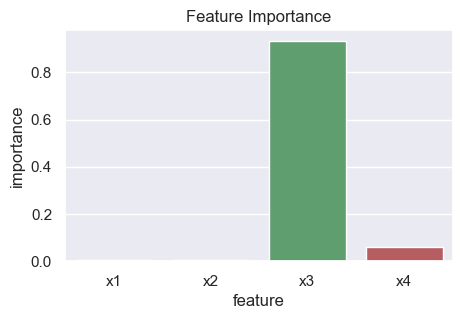

In [27]:
sns.set(rc={"figure.figsize":(5, 3)}) 
sns.barplot(data=ft_imp0, x='feature', y='importance').set_title('Feature Importance');

### Working with hyperparameters

**Without limiting `max_depth` hyperparameter**

In [28]:
# Without limiting max_depth
rf_model1 = RandomForestRegressor(n_estimators=20,  # Number of trees
                                #max_depth=2,       # Max depth of each tree
                                oob_score=True,     # Use OOB scoring
                                random_state=0)     # For reproducibility
rf_model1.fit(X, y)
print("    Score = %.4f" %(rf_model1.score(X, y)))
print("OOB_Score = %.4f" %(rf_model1.oob_score_))

    Score = 0.9850
OOB_Score = 0.8893


**Increasing the number of trees**

Let's record the scores of several random forest models with different number of trees.

In [29]:
# With 50 trees
rf_model2 = RandomForestRegressor(n_estimators=50,      # Number of trees                                     
                                  oob_score=True,       # Use OOB scoring
                                  random_state=0)       # For reproducibility  
rf_model2.fit(X, y)
print("    Score = %.4f" %(rf_model2.score(X, y)))
print("OOB_Score = %.4f" %(rf_model2.oob_score_))

    Score = 0.9852
OOB_Score = 0.8925


In [30]:
# With 100 trees
rf_model3 = RandomForestRegressor(n_estimators=100,     # Number of trees (default value) 
                                  oob_score=True,       # Use OOB scoring
                                  random_state=0)       # For reproducibility  
rf_model3.fit(X, y)
print("    Score = %.4f" %(rf_model3.score(X, y)))
print("OOB_Score = %.4f" %(rf_model3.oob_score_))

    Score = 0.9860
OOB_Score = 0.9008


In [31]:
# With 500 trees
rf_model4 = RandomForestRegressor(n_estimators=500,     # Number of trees                                
                                  oob_score=True,       # Use OOB scoring
                                  random_state=0)       # For reproducibility  
rf_model4.fit(X, y)
print("    Score = %.4f" %(rf_model4.score(X, y)))
print("OOB_Score = %.4f" %(rf_model4.oob_score_))

    Score = 0.9871
OOB_Score = 0.9019


As you can see, the more trees you use in the random forest model, the better the scores.

## Advertising Data

The Advertising data set consists of the sales of a product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [32]:
# Getting data
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Descriptive Statistics

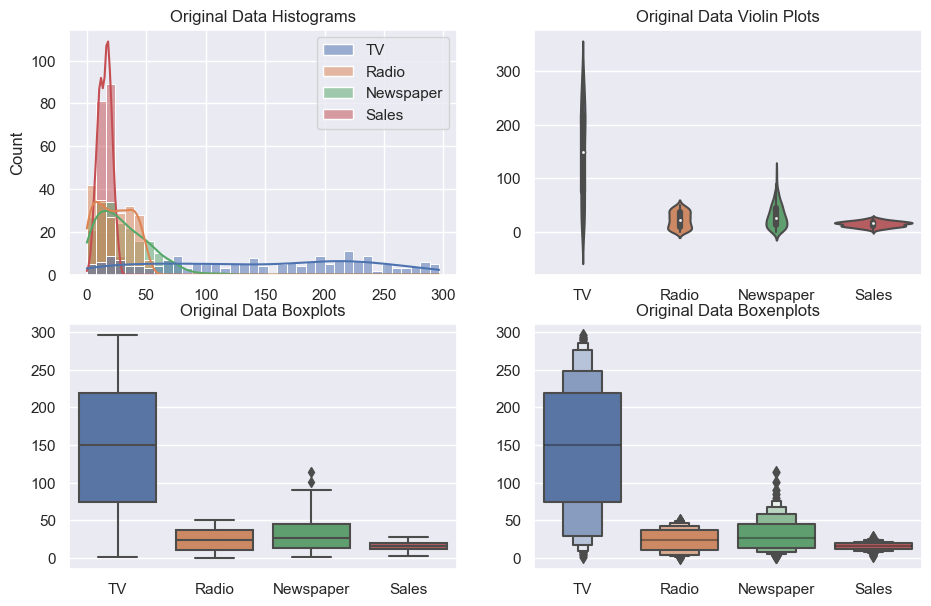

In [33]:
plt.figure(figsize=(11, 7))

plt.subplot(221)
sns.histplot(data = df, kde=True).set(title="Original Data Histograms")

plt.subplot(222)
sns.violinplot(data = df).set(title="Original Data Violin Plots")

plt.subplot(223)
sns.boxplot(data = df).set(title="Original Data Boxplots")

plt.subplot(224)
sns.boxenplot(data = df).set(title="Original Data Boxenplots");

### Random Forest Models

In [34]:
# Feature Matrix
X1 = df[['TV', 'Radio', 'Newspaper']]
X1.head()

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [35]:
# Target variable
y1 = df.Sales

Let's use the cross-validation option. We will set  `bootstrap=False` for using all the training data in the tree models. Notice in this case, you cannot compute the `oob_score`. It is only available if `bootstrap=True`

In [36]:
# Initialize the model
rf_model5 = RandomForestRegressor(n_estimators=100,     # Number of trees
                                max_depth=3,            # Max depth of trees    
                                bootstrap=False,        # For using all the training data in the tree models                                
                                random_state=0)         # For reproducibility

The simplest way to use cross-validation is by calling the `cross_val_score`.

In [37]:
cross_v = cross_val_score(rf_model5, X1, y1, cv=5)
cross_v

array([0.83838711, 0.92088699, 0.80681687, 0.85277306, 0.8422722 ])

In [38]:
print('%i fold cross-validation score = %.2f with standard deviation = %.2f' 
      %(len(cross_v), cross_v.mean(), cross_v.std()))

5 fold cross-validation score = 0.85 with standard deviation = 0.04


In [39]:
cross_v = cross_val_score(rf_model5, X1, y1, cv=10)
print('%i fold cross-validation score = %.2f with standard deviation = %.2f' 
      %(len(cross_v), cross_v.mean(), cross_v.std()))

10 fold cross-validation score = 0.84 with standard deviation = 0.06


By default, the score computed at each cross-validation iteration is the score method of the estimator. It is possible to change this by using the scoring parameter:

In [40]:
from sklearn import metrics

In [41]:
# Using explained_variance
cross_v = cross_val_score(rf_model5, X1, y1, cv=10, scoring='explained_variance')
print('%i fold cross-validation score = %.2f with standard deviation = %.2f' 
      %(len(cross_v), cross_v.mean(), cross_v.std()))

10 fold cross-validation score = 0.86 with standard deviation = 0.04


In [42]:
# r2 is the score used in the estimator
cross_v = cross_val_score(rf_model5, X1, y1, cv=10, scoring='r2')
print('%i fold cross-validation score = %.2f with standard deviation = %.2f' 
      %(len(cross_v), cross_v.mean(), cross_v.std()))

10 fold cross-validation score = 0.84 with standard deviation = 0.06


In [43]:
# Initialize the model using 100 tree models and a minimum of 5 cases per leaf node
rf_model6 = RandomForestRegressor(n_estimators=100,     # Number of trees      
                                min_samples_leaf=5,     # Number of min observations in each leaf node                            
                                bootstrap=False,        # For using all the training data in the tree models                                
                                random_state=0)         # For reproducibility

In [44]:
cross_v = cross_val_score(rf_model6, X1, y1, cv=10)
print('%i fold cross-validation score = %.2f with standard deviation = %.2f' 
      %(len(cross_v), cross_v.mean(), cross_v.std()))

10 fold cross-validation score = 0.92 with standard deviation = 0.05


## Conclusions

Key Takeaways:
- Due to its ensemble approach, Random Forests provide higher overall accuracy for regression tasks than individual decision trees.
- The model's performance benefits from multiple trees, reducing variance and avoiding overfitting, which is common in single decision tree models.
- Out-of-bag (OOB) scoring offers a robust estimate of model accuracy without the need for separate validation sets.
- Feature importance metrics help identify which predictors most influence the response variable, guiding more focused data collection and feature engineering.
- Adjusting parameters like the number of trees and tree depth impacts model accuracy and complexity, allowing for customizable performance tuning.
- Cross-validation results show that Random Forest maintains consistent performance across different subsets of data, confirming its reliability and stability as a predictive model.
- The model's adaptability is evident through its performance across various hyperparameter settings, demonstrating its effectiveness in different configurations and scenarios.

## References

- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html
- VanderPlas, J. (2017) Python Data Science Handbook: Essential Tools for Working with Data. USA: O’Reilly Media, Inc, chapter 5